# Análisis de Datos de Global Superstore

El dataset de Kaggle Global Superstore es un conjunto de datos completo que contiene información sobre ventas y pedidos en una supertienda global. Es un recurso valioso para tareas de análisis y visualización de datos. Este dataset ha sido procesado y transformado de su formato original (txt) a CSV utilizando el lenguaje de programación R. El dataset original está disponible aquí, y el archivo CSV transformado utilizado en este análisis se puede encontrar aquí.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('D:\Global Superstore Dataset\superstore.csv')
#importamos el archivo csv

In [81]:
df.info()
#nos muestra la información de las columnas, donde observamos que se tiene variables de tipo object, int y float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [82]:
df.head(5)
#nos muestra las primeras 5 filas del dataset, las cuales incluyen el encabezado y los datos de las columnas

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [83]:
df.describe() .T
#nos muestra un resumen estadístico, aplicando traspuesta para que sea más fácil de leer

,count,mean,std,min,25%,50%,75%,max
Discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
记录数,51290.0,1.000000,0.000000,1.000,1.00,1.00,1.00,1.000
Profit,51290.0,28.610982,174.340972,-6599.978,0.00,9.24,36.81,8399.976
Quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
Row.ID,51290.0,25645.500000,14806.291990,1.000,12823.25,25645.50,38467.75,51290.000
Sales,51290.0,246.498440,487.567175,0.000,31.00,85.00,251.00,22638.000
Shipping.Cost,51290.0,26.375818,57.296810,0.002,2.61,7.79,24.45,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000
weeknum,51290.0,31.287112,14.429795,1.000,20.00,33.00,44.00,53.000


In [84]:
df.drop(columns='记录数', inplace=True)
#eliminamos la columna '记录数' que en español se traduce como 'Número de registros' ya que no es necesaria

In [ ]:
df.isnull().sum()
#verificamos si existen valores nulos en el dataset

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

# 📊 Análisis Estratégico del Rendimiento del Negocio de Global Superstore

El análisis de datos de **Global Superstore** se centra en proporcionar una visión más detallada y estratégica del rendimiento del negocio mediante la identificación y evaluación de varios **KPIs** (Key Performance Indicators). Estos KPIs son esenciales para comprender aspectos críticos del negocio, tales como el valor del cliente a lo largo del tiempo, la eficiencia de las ventas y el crecimiento del negocio. A continuación, se realizara el 🔍 Exploratory Data Analysis (EDA) y se presentaran algunas referencias bibliográficas que sustentan la importancia de estos KPIs en el análisis de datos empresariales.




## 📈 Eficiencia de las Ventas

La eficiencia de las ventas se puede medir a través de indicadores como el **Average Order Value (AOV)** y la frecuencia de órdenes por cliente. Estos KPIs ayudan a las empresas a evaluar el rendimiento de sus estrategias de ventas y a identificar oportunidades para aumentar el valor de las órdenes y la frecuencia de compra. Kotler y Keller (2016) destacan la importancia de estos indicadores para optimizar las estrategias de ventas y maximizar los ingresos.

> **Referencia:** Kotler, P., & Keller, K. L. (2016). *Marketing Management* (15th ed.). Pearson.

## 💡 Valor del Cliente a lo Largo del Tiempo

El valor del cliente a lo largo del tiempo, también conocido como **Customer Lifetime Value (CLV)**, es un indicador clave que permite a las empresas medir el valor total que un cliente aporta durante toda su relación con la empresa. Según Gupta y Lehmann (2005), el CLV es fundamental para la toma de decisiones estratégicas en marketing y gestión de clientes, ya que permite identificar a los clientes más valiosos y diseñar estrategias para retenerlos.

> **Referencia:** Gupta, S., & Lehmann, D. R. (2005). *Managing Customers as Investments: The Strategic Value of Customers in the Long Run*. Wharton School Publishing.

In [17]:
# Calcular el valor promedio de las órdenes
df['Order.Value'] = df['Sales'] - df['Shipping.Cost']
c_aov = df.groupby('Customer.ID')['Order.Value'].mean()
c_aov.head()

Customer.ID
AA-103151    131.180000
AA-103152    340.238750
AA-103153    114.767600
AA-103154    471.127273
AA-103751    239.467778
Name: Order.Value, dtype: float64

In [18]:
# Calcular la frecuencia de órdenes por cliente
c_order_frequency = df.groupby('Customer.ID')['Order.ID'].count()
c_order_frequency.head()

Customer.ID
AA-103151    10
AA-103152    16
AA-103153     5
AA-103154    11
AA-103751     9
Name: Order.ID, dtype: int64

In [19]:
# Calcular el Customer Lifetime Value (CLV)
clv = c_aov * c_order_frequency
clv.head()




Customer.ID
AA-103151    1311.800
AA-103152    5443.820
AA-103153     573.838
AA-103154    5182.400
AA-103751    2155.210
dtype: float64

# Segmentación de Clientes en las empresas

La segmentación de clientes es una técnica crucial en el análisis de datos de Global Superstore, ya que permite a la empresa identificar y comprender mejor a sus diferentes grupos de clientes. Al dividir a los clientes en segmentos basados en características específicas como el **Customer Lifetime Value (CLV)** y el **Profit Average**, la empresa puede desarrollar estrategias de marketing y retención más efectivas y personalizadas.

### Beneficios de la Segmentación de Clientes

1. **Estrategias de Marketing Personalizadas**:
   - Permite crear campañas de marketing dirigidas a segmentos específicos, aumentando la relevancia y efectividad de las comunicaciones.

2. **Optimización de Recursos**:
   - Ayuda a asignar recursos de manera más eficiente, enfocándose en los segmentos de clientes más valiosos y rentables.

3. **Mejora de la Retención de Clientes**:
   - Facilita la identificación de clientes con alto CLV, permitiendo implementar programas de fidelización y retención para maximizar su valor a largo plazo.

4. **Identificación de Oportunidades de Crecimiento**:
   - Revela patrones y tendencias en el comportamiento de los clientes, proporcionando información valiosa para identificar oportunidades de upselling y cross-selling.

5. **Toma de Decisiones Informadas**:
   - Proporciona una base sólida para la toma de decisiones estratégicas, basadas en datos y análisis detallados de los diferentes segmentos de clientes.

En resumen, la segmentación de clientes es una herramienta poderosa que permite a las empresas el valor de sus clientes, optimizar sus estrategias de marketing y mejorar la eficiencia operativa. Al comprender mejor a sus clientes, la empresa puede tomar decisiones más informadas y estratégicas, impulsando el crecimiento y la rentabilidad a largo plazo.

In [27]:
# Calcular el promedio de 'profit' por 'customer_id'
profit_avg = df.groupby('Customer.ID')['Profit'].mean()
print(profit_avg.head())

Customer.ID
AA-103151     1.287600
AA-103152    35.546062
AA-103153    45.792000
AA-103154   -32.989318
AA-103751    64.215000
Name: Profit, dtype: float64


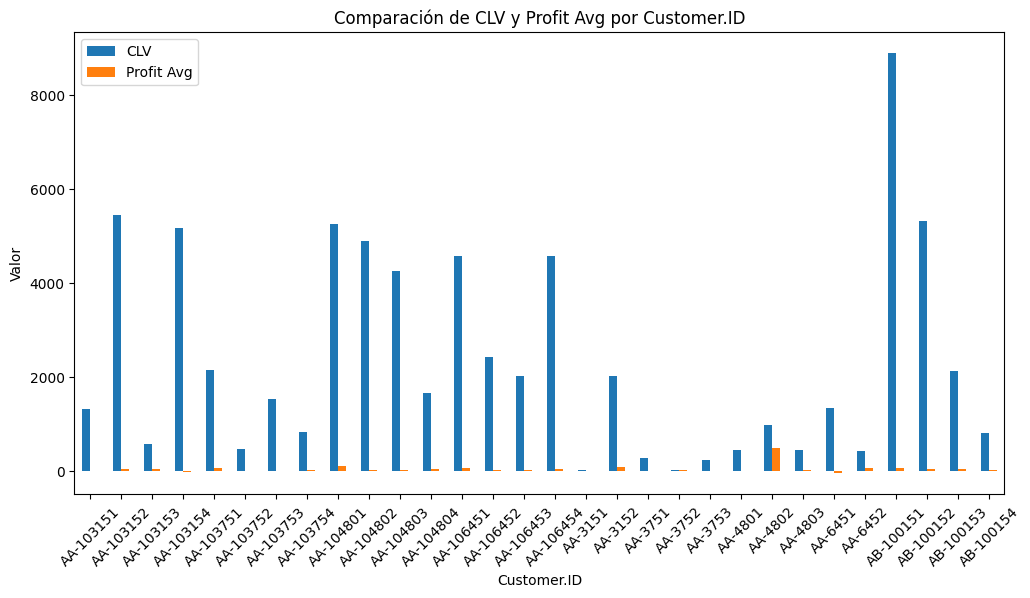

In [ ]:
# Crear un DataFrame con Customer Lifetime Value (CLV) y Profit Avg
comparison_df = pd.DataFrame({
    'CLV': clv,
    'Profit Avg': profit_avg
})

# Seleccionar los primeros 30 clientes para una mejor visualización
comparison_dff = comparison_df.head(30)

# Crear el gráfico de barras
comparison_dff.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de CLV y Profit Avg por Customer.ID')
plt.xlabel('Customer.ID')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [47]:
comparison_df.shape

(4873, 2)

In [48]:
#evaluamos la correlación entre CLV y Profit Avg para determinar si existe una relación lineal entre ambas variables
correlation = comparison_df['CLV'].corr(comparison_df['Profit Avg'])
print(f"Correlación entre CLV y Profit Avg: {correlation}")

Correlación entre CLV y Profit Avg: 0.2992611108931222


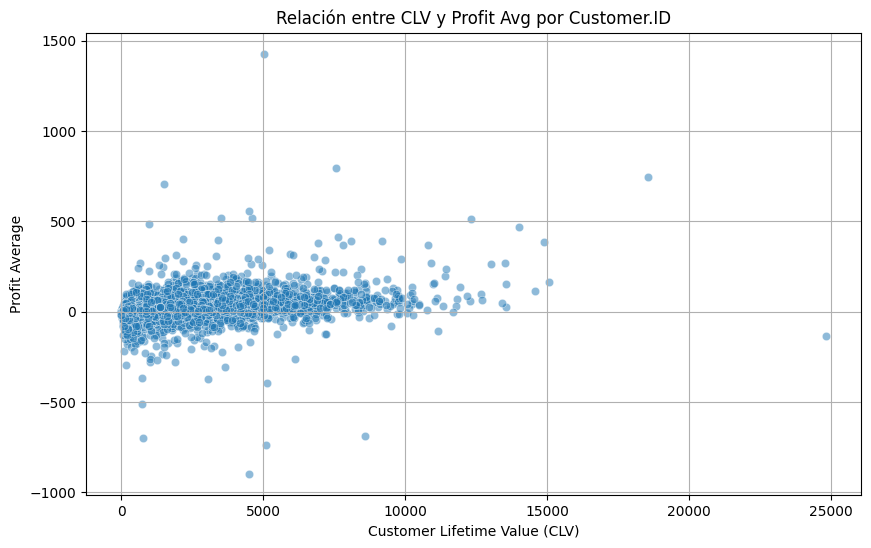

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='Profit Avg', data=comparison_df, alpha=0.5)
plt.title('Relación entre CLV y Profit Avg por Customer.ID')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Profit Average')
plt.grid(True)

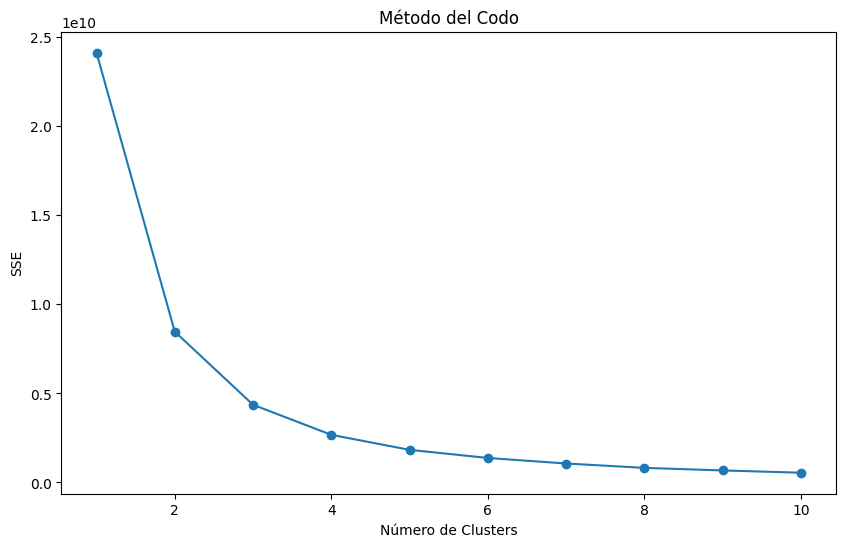

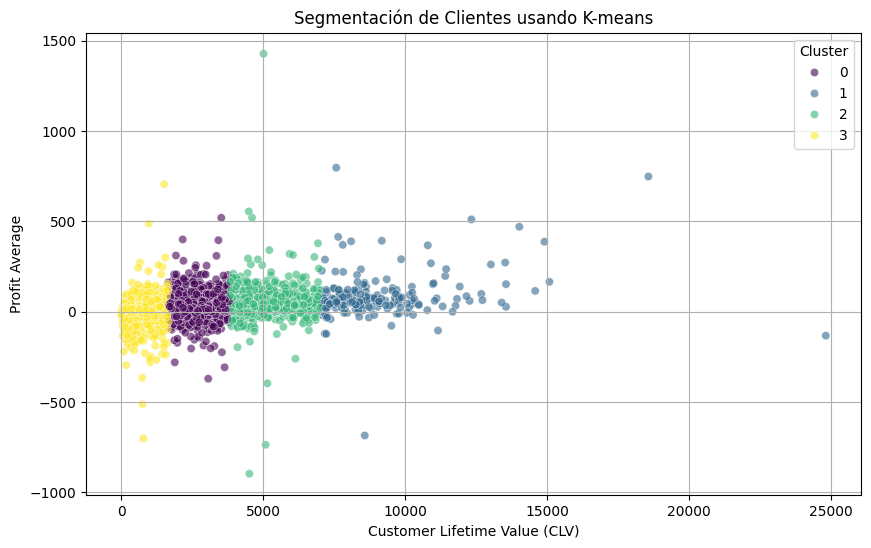

In [64]:

from sklearn.cluster import KMeans

data = comparison_df[['CLV', 'Profit Avg']]

# Determinar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters (supongamos 3)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Añadir los labels de los clusters al DataFrame
comparison_df['Cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='Profit Avg', hue='Cluster', data=comparison_df, palette='viridis', alpha=0.6)
plt.title('Segmentación de Clientes usando K-means')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Profit Average')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

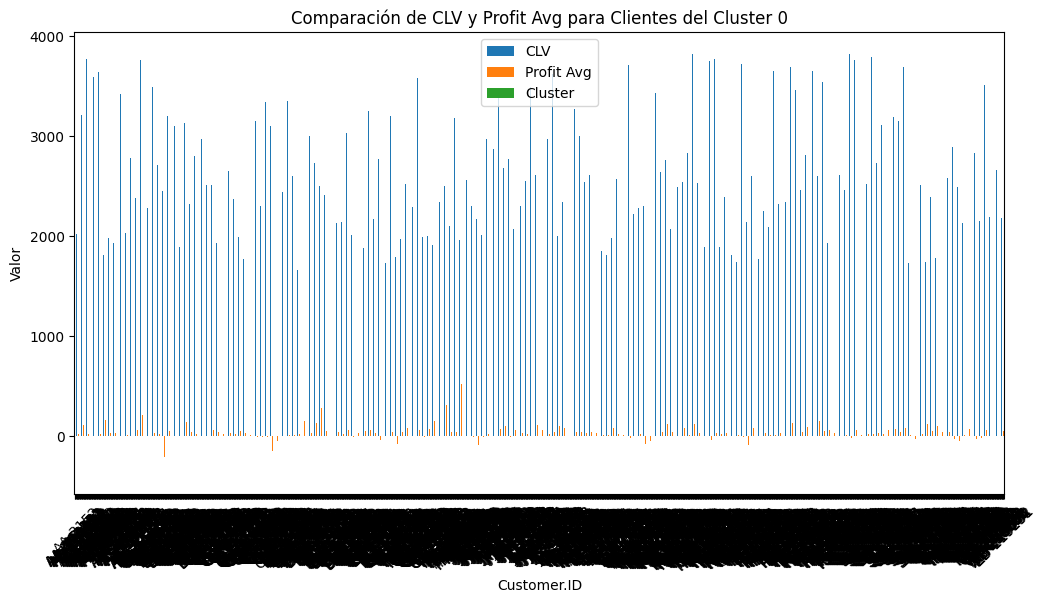

Promedio del Profit del Cluster 0: 32.145223484058086


In [65]:
cluster_0_customers = comparison_df[comparison_df['Cluster'] == 0].index
# Filtrar los datos de los clientes del cluster 0
cluster_0_data = comparison_df.loc[cluster_0_customers]

# Crear el gráfico de barras
cluster_0_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de CLV y Profit Avg para Clientes del Cluster 0')
plt.xlabel('Customer.ID')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
# Calcular el promedio del profit del cluster 0
avg_profit_cluster_0 = cluster_0_data['Profit Avg'].mean()
print(f"Promedio del Profit del Cluster 0: {avg_profit_cluster_0}")

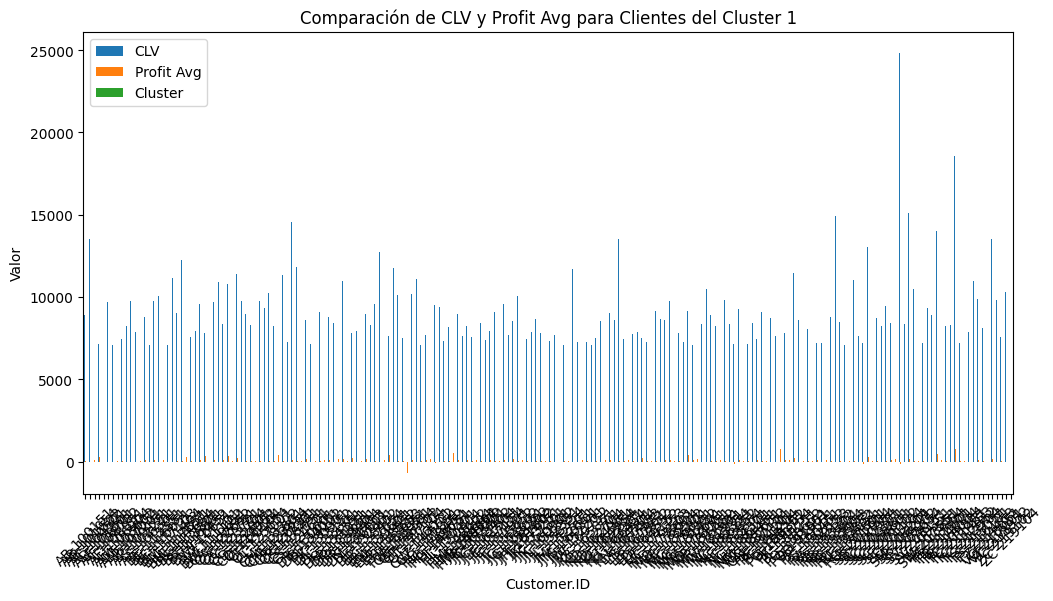

Promedio del Profit del Cluster 1: 86.69957631464952


In [66]:
cluster_1_customers = comparison_df[comparison_df['Cluster'] == 1].index
# Filtrar los datos de los clientes del cluster 1
cluster_1_data = comparison_df.loc[cluster_1_customers]

# Crear el gráfico de barras
cluster_1_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de CLV y Profit Avg para Clientes del Cluster 1')
plt.xlabel('Customer.ID')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
# Calcular el promedio del profit del cluster 1
avg_profit_cluster_1 = cluster_1_data['Profit Avg'].mean()
print(f"Promedio del Profit del Cluster 1: {avg_profit_cluster_1}")

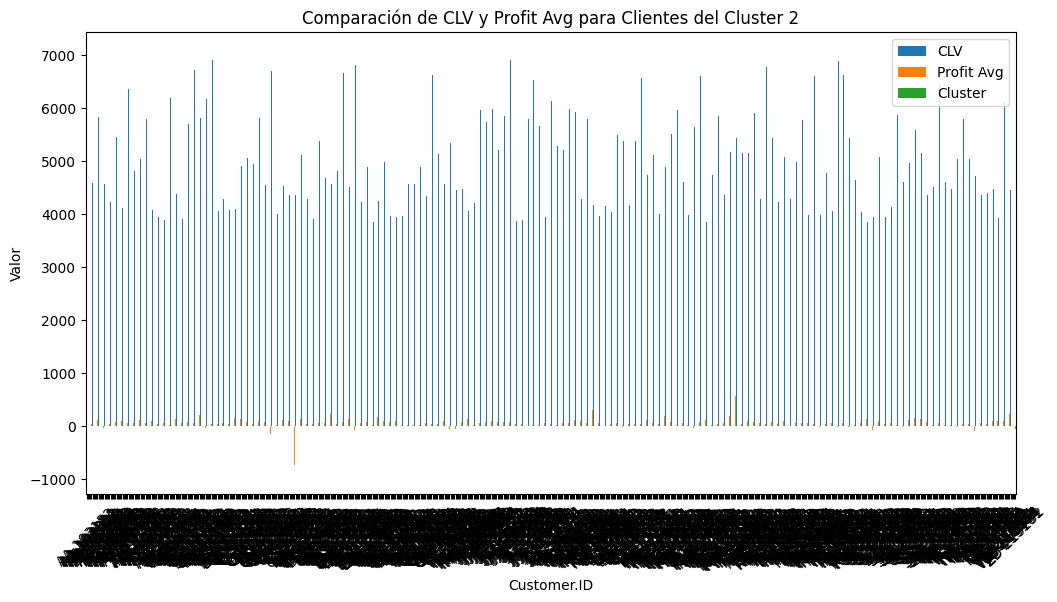

Promedio del Profit del Cluster 2: 51.17887717261527


In [67]:
cluster_2_customers = comparison_df[comparison_df['Cluster'] == 2].index
# Filtrar los datos de los clientes del cluster 2
cluster_2_data = comparison_df.loc[cluster_2_customers]

# Crear el gráfico de barras
cluster_2_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de CLV y Profit Avg para Clientes del Cluster 2')
plt.xlabel('Customer.ID')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
# Calcular el promedio del profit del cluster 2
avg_profit_cluster_2 = cluster_2_data['Profit Avg'].mean()
print(f"Promedio del Profit del Cluster 2: {avg_profit_cluster_2}")

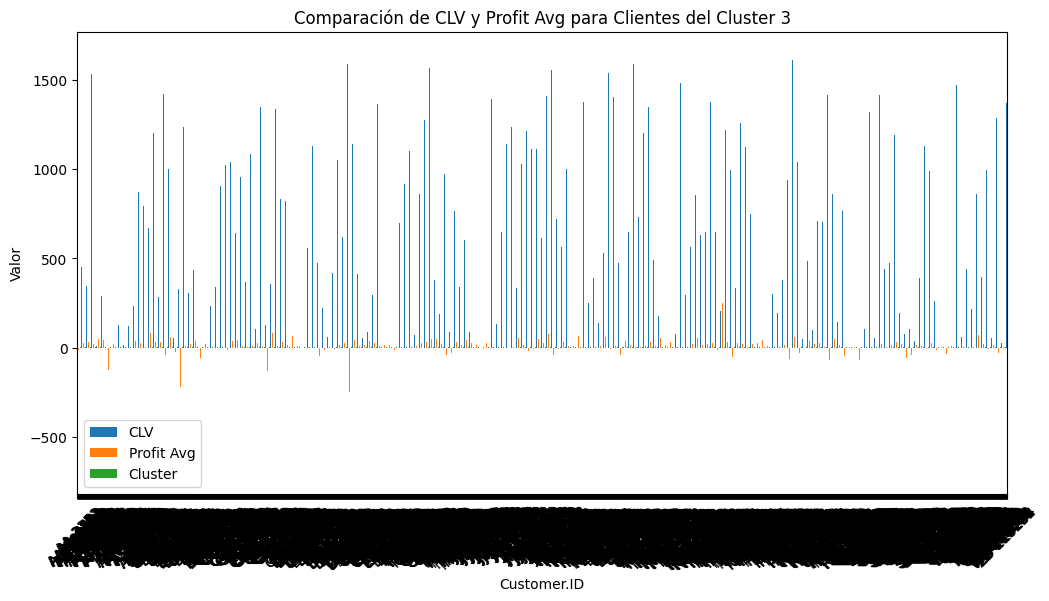

Promedio del Profit del Cluster 3: 11.126681552262186


In [69]:
cluster_3_customers = comparison_df[comparison_df['Cluster'] == 3].index
# Filtrar los datos de los clientes del cluster 3
cluster_3_data = comparison_df.loc[cluster_3_customers]

# Crear el gráfico de barras
cluster_3_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de CLV y Profit Avg para Clientes del Cluster 3')
plt.xlabel('Customer.ID')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
# Calcular el promedio del profit del cluster 3
avg_profit_cluster_3 = cluster_3_data['Profit Avg'].mean()
print(f"Promedio del Profit del Cluster 3: {avg_profit_cluster_3}")

## Segmentación de Clientes por Cluster

En este análisis, examinamos el rango del **Customer Lifetime Value (CLV)** y el promedio del **Profit** por cada uno de los clusters identificados en nuestro dataset. 

## Rango de CLV por Cluster

El rango de CLV se define como la diferencia entre el valor máximo y el valor mínimo de CLV en cada cluster. A continuación, se presenta el rango de CLV para cada cluster:

| Cluster | CLV Mínimo | CLV Máximo | Rango de CLV |
|---------|------------|------------|--------------|
| 0       | 6.15       | 3548.47    | 3542.32      |
| 1       | 5330.29    | 13560.26   | 8229.97      |
| 2       | 4175.18    | 6784.59    | 2609.41      |
| 3       | 573.84     | 2155.21    | 1581.37      |

## Promedio del Profit por Cluster

El promedio del Profit por cluster ya ha sido calculado y es el siguiente:

- **Cluster 0**: 32.145223484058086
- **Cluster 1**: 86.69957631464952
- **Cluster 2**: 51.17887717261527
- **Cluster 3**: 11.126681552262186

## Interpretación de los Resultados

### Cluster 0
- **Rango de CLV**: 3542.32
- **Promedio del Profit**: 32.145223
- **Interpretación**: Este cluster tiene un rango de CLV moderado y un promedio de Profit bajo. Esto sugiere que los clientes en este cluster tienen un valor de vida relativamente bajo y generan menos ganancias en promedio. Las estrategias de marketing podrían enfocarse en aumentar el valor de vida de estos clientes mediante programas de fidelización y ofertas personalizadas.

### Cluster 1
- **Rango de CLV**: 8229.97
- **Promedio del Profit**: 86.699576
- **Interpretación**: Este cluster tiene el rango de CLV más alto y también el promedio de Profit más alto. Esto indica que los clientes en este cluster tienen un valor de vida alto y generan más ganancias en promedio, lo que los convierte en los clientes más valiosos. Las estrategias de retención y fidelización deben enfocarse en mantener y maximizar el valor de estos clientes.

### Cluster 2
- **Rango de CLV**: 2609.41
- **Promedio del Profit**: 51.178877
- **Interpretación**: Este cluster tiene un rango de CLV intermedio y un promedio de Profit también intermedio. Los clientes en este cluster tienen un valor de vida y ganancias moderadas. Las estrategias de marketing pueden enfocarse en identificar oportunidades de upselling y cross-selling para aumentar tanto el CLV como el Profit de estos clientes.

### Cluster 3
- **Rango de CLV**: 1581.37
- **Promedio del Profit**: 11.126682
- **Interpretación**: Este cluster tiene el rango de CLV más bajo y también el promedio de Profit más bajo. Esto sugiere que los clientes en este cluster tienen un valor de vida relativamente bajo y generan menos ganancias en promedio. Las estrategias de marketing podrían enfocarse en aumentar el valor de vida de estos clientes mediante programas de fidelización y ofertas personalizadas.

## Conclusión

El análisis de la Segmentación de Clientes por cada cluster proporciona información valiosa sobre la segmentación de clientes. Los clientes en el Cluster 1 son los más valiosos, con el mayor rango de CLV y el mayor promedio de Profit. Las estrategias de marketing y retención deben enfocarse en maximizar el valor de estos clientes. Los clientes en el Cluster 3, aunque menos valiosos, pueden beneficiarse de estrategias de upselling y cross-selling para aumentar su CLV y Profit. Segmentación de Clientes por Cluster


In [86]:
df_c = df.copy()
df_c['Order.Date'] = pd.to_datetime(df_c['Order.Date'])
df_c.set_index('Order.Date', inplace=True)
sales_growth_rate = df_c['Sales'].resample('ME').sum().pct_change().mean() * 100
print(f"Sales Growth Rate: {sales_growth_rate}%")

Sales Growth Rate: 10.226832276336841%



## 🚀 Crecimiento del Negocio

El crecimiento del negocio se puede evaluar mediante la **tasa de crecimiento de las ventas**, que mide el aumento porcentual de las ventas en un período de tiempo determinado. Este KPI es crucial para entender la evolución del negocio y planificar estrategias de expansión. Según McKinsey & Company (2018), el análisis del crecimiento de las ventas permite a las empresas identificar tendencias y ajustar sus estrategias para mantener un crecimiento sostenible.

> **Referencia:** McKinsey & Company. (2018). *The Granularity of Growth: How to Identify the Sources of Growth and Drive Enduring Company Performance*. John Wiley & Sons.

In [89]:
from statsmodels.tsa.arima.model import ARIMA

# Identificar los cinco productos más vendidos
top_products = df.groupby('Product.ID')['Quantity'].sum().nlargest(5).index

# Crear un DataFrame para almacenar los resultados del modelo ARIMA
arima_results = {}

# Aplicar el modelo ARIMA a cada uno de los cinco productos más vendidos
for product_id in top_products:
    product_data = df[df['Product.ID'] == product_id].copy()
    product_data['Order.Date'] = pd.to_datetime(product_data['Order.Date'])
    product_data.set_index('Order.Date', inplace=True)
    product_profit = product_data['Profit'].resample('ME').sum()
    
    # Ajustar el modelo ARIMA
    model = ARIMA(product_profit, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Almacenar los resultados
    arima_results[product_id] = model_fit

# Mostrar los resultados del modelo ARIMA para cada producto
for product_id, model_fit in arima_results.items():
    print(f"Resultados del modelo ARIMA para el producto {product_id}:")
    print(model_fit.summary())
    print("\n")

Resultados del modelo ARIMA para el producto OFF-AR-10003651:
                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   46
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -223.512
Date:                Mon, 02 Dec 2024   AIC                            459.023
Time:                        20:48:41   BIC                            469.863
Sample:                    03-31-2011   HQIC                           463.064
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8483      0.126     -6.736      0.000      -1.095      -0.601
ar.L2         -0.8837      0.225     -3.933      0.000      -1.324   

In [ ]:
#Profit Margin by Product Category:
profit_margin_category = df.groupby('category').apply(lambda x: (x['profit'].sum() / x['sales'].sum()) * 100)
print("Profit Margin by Product Category:")
print(profit_margin_category)

## 💰 Margen de Ganancia por Categoría de Producto

El **margen de ganancia por categoría de producto** es otro KPI importante que permite a las empresas evaluar la rentabilidad de diferentes líneas de productos. Este indicador ayuda a identificar las categorías más rentables y a tomar decisiones informadas sobre la asignación de recursos. Porter (1985) subraya la importancia de analizar la rentabilidad por categoría de producto para desarrollar estrategias competitivas efectivas.

> **Referencia:** Porter, M. E. (1985). *Competitive Advantage: Creating and Sustaining Superior Performance*. Free Press.



## 🎯 Conclusión

En resumen, el análisis de datos de **Global Superstore** mediante estos KPIs proporciona una visión integral del rendimiento del negocio, permitiendo a las empresas tomar decisiones estratégicas informadas. La literatura existente respalda la relevancia de estos indicadores para la gestión y optimización del rendimiento empresarial.

---

### 📚 Referencias:

- Gupta, S., & Lehmann, D. R. (2005). *Managing Customers as Investments: The Strategic Value of Customers in the Long Run*. Wharton School Publishing.
- Kotler, P., & Keller, K. L. (2016). *Marketing Management* (15th ed.). Pearson.
- McKinsey & Company. (2018). *The Granularity of Growth: How to Identify the Sources of Growth and Drive Enduring Company Performance*. John Wiley & Sons.
- Porter, M. E. (1985). *Competitive Advantage: Creating and Sustaining Superior Performance*. Free Press.